In [3]:
import pandas as pd
from pathlib import Path
from IPython.display import display

# ------------------------------------------------------------------
# edit here only
# ------------------------------------------------------------------
seeds = [42, 43, 44]
experiment_folders = [
    f"042_resnet50_dual5foldstrat_seed{s}_real_perc1.0" for s in seeds
]
base_dir  = Path("experiments")
patience  = 20        # pick the epoch that matches when early stop was triggered
# -------------------------------------------------------------

exp_mean_rows   = []          # store one row per experiment (mean of its folds)
exp_var_rows    = []          # store fold-variance per experiment
per_exp_fold_df = {}          # hold the detailed fold tables

for exp in experiment_folders:
    log_csv = base_dir / exp / "logs.csv"
    if not log_csv.exists():
        print(f"[warning] {exp}: logs.csv not found → skipped")
        continue
    
    df = pd.read_csv(log_csv)
    val_rows = df[df.phase == "val"]

    picks = []
    for fold, g in val_rows.groupby("fold"):b
        last_ep   = g["epoch"].max()
        target_ep = max(last_ep - patience, g["epoch"].min())
        picks.append(g[g["epoch"] == target_ep])

    fold_df = (
        pd.concat(picks, ignore_index=True)
          .set_index("fold")
          .sort_index()
    )
    
    # keep only numeric metrics
    metrics = fold_df.select_dtypes("number").drop(columns=["epoch"])
    per_exp_fold_df[exp] = metrics.round(4)          # save for optional later display
    
    exp_mean = metrics.mean().to_frame().T
    exp_mean["experiment"] = exp
    exp_mean_rows.append(exp_mean)
    
    exp_var  = metrics.var(ddof=0).to_frame().T      # population variance
    exp_var["experiment"] = exp
    exp_var_rows.append(exp_var)

# ------ table 1: per-experiment, per-fold --------------------------------
for exp, fdf in per_exp_fold_df.items():
    print(f"\n▶  {exp}")
    display(
        pd.concat(
            [fdf, fdf.mean().to_frame().T.assign(fold="mean"),
                  fdf.var(ddof=0).to_frame().T.assign(fold="var")],
            axis=0
        ).set_index("fold")
    )

# ------ table 2: experiment means (+ variance across experiments) ---------
exp_means = pd.concat(exp_mean_rows, ignore_index=True).set_index("experiment")
exp_vars  = pd.concat(exp_var_rows,  ignore_index=True).set_index("experiment")

summary   = exp_means.round(4)
summary.loc["across_experiments_var"] = exp_means.var(ddof=0).round(4)

print("\n▶  Mean metrics per experiment (last-20 epoch) + variance across experiments")
display(summary)


▶  042_resnet50_dual5foldstrat_seed42_real_perc1.0


,loss,accuracy,AUC,balanced_accuracy,macro_precision,macro_recall,macro_f1
fold,,,,,,,
NaN,1.208300,0.447500,0.67450,0.352200,0.379200,0.352200,0.306700
NaN,0.957200,0.578100,0.81190,0.529000,0.541600,0.529000,0.528300
NaN,0.743300,0.687000,0.88550,0.671400,0.667300,0.671400,0.665600
NaN,0.744200,0.686400,0.89000,0.659500,0.682800,0.659500,0.668300
NaN,0.781800,0.671000,0.88120,0.644900,0.674000,0.644900,0.656300
mean,0.886960,0.614000,0.82862,0.571400,0.588980,0.571400,0.565040
var,0.032054,0.008566,0.00676,0.014602,0.013683,0.014602,0.019439



▶  042_resnet50_dual5foldstrat_seed43_real_perc1.0


,loss,accuracy,AUC,balanced_accuracy,macro_precision,macro_recall,macro_f1
fold,,,,,,,
NaN,1.232500,0.435500,0.652800,0.331200,0.356900,0.331200,0.297100
NaN,1.139300,0.491600,0.719300,0.404400,0.419400,0.404400,0.388100
NaN,0.866000,0.610800,0.845100,0.568400,0.567400,0.568400,0.564400
NaN,0.761400,0.675000,0.881000,0.644000,0.650500,0.644000,0.643100
NaN,0.860800,0.617100,0.855100,0.551700,0.613900,0.551700,0.560400
mean,0.972000,0.566000,0.790660,0.499940,0.521620,0.499940,0.490620
var,0.032761,0.007813,0.007875,0.013144,0.012961,0.013144,0.016305



▶  042_resnet50_dual5foldstrat_seed44_real_perc1.0


,loss,accuracy,AUC,balanced_accuracy,macro_precision,macro_recall,macro_f1
fold,,,,,,,
NaN,1.23200,0.432800,0.66100,0.34950,0.36760,0.34950,0.334100
NaN,0.96900,0.578700,0.80830,0.53390,0.53930,0.53390,0.528200
NaN,0.86950,0.639600,0.85390,0.58960,0.62690,0.58960,0.599000
NaN,0.89410,0.604800,0.84530,0.54390,0.60130,0.54390,0.556500
NaN,0.93890,0.599700,0.83470,0.52560,0.61650,0.52560,0.537000
mean,0.98070,0.571120,0.80064,0.50850,0.55032,0.50850,0.510960
var,0.01698,0.005166,0.00511,0.00681,0.00927,0.00681,0.008416



▶  Mean metrics per experiment (last-20 epoch) + variance across experiments


,loss,accuracy,AUC,balanced_accuracy,macro_precision,macro_recall,macro_f1
experiment,,,,,,,
042_resnet50_dual5foldstrat_seed42_real_perc1.0,0.8870,0.6140,0.8286,0.5714,0.5890,0.5714,0.5650
042_resnet50_dual5foldstrat_seed43_real_perc1.0,0.9720,0.5660,0.7906,0.4999,0.5216,0.4999,0.4906
042_resnet50_dual5foldstrat_seed44_real_perc1.0,0.9807,0.5711,0.8006,0.5085,0.5503,0.5085,0.5110
across_experiments_var,0.0018,0.0005,0.0003,0.0010,0.0008,0.0010,0.0010


/tmp/ipykernel_21688/3102058679.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), ha='right')
/tmp/ipykernel_21688/3102058679.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), ha='right')


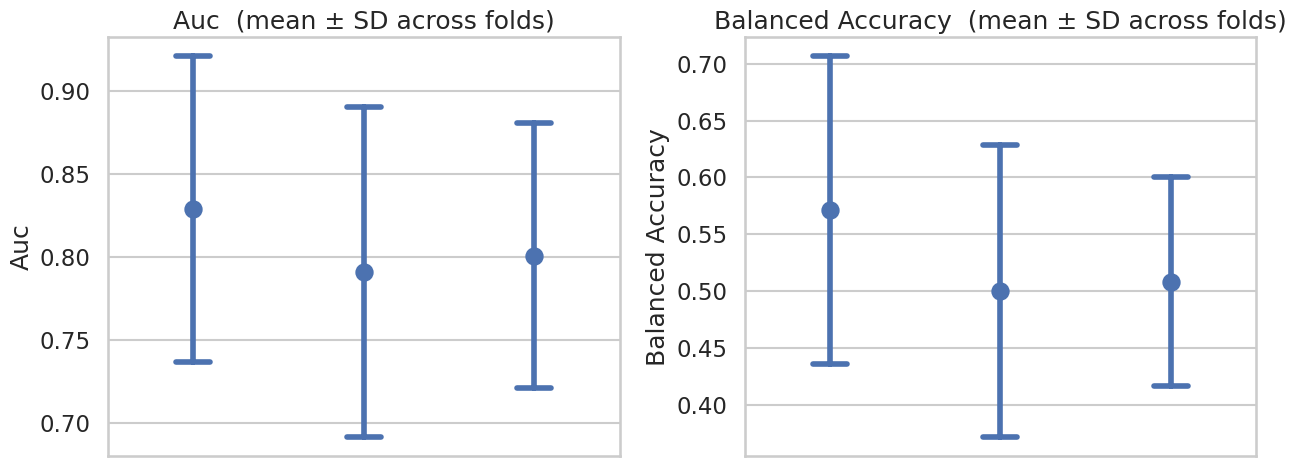

In [8]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

# ── editable bits ────────────────────────────────────────────────
seeds = [42, 43, 44]
experiment_folders = [
    f"042_resnet50_dual5foldstrat_seed{s}_real_perc1.0" for s in seeds
]
base_dir = Path("experiments")
patience = 20
# ─────────────────────────────────────────────────────────────────

rows = []
for exp in experiment_folders:
    log_csv = base_dir / exp / "logs.csv"
    if not log_csv.exists():
        print(f"⚠  {exp}: logs.csv not found – skipped")
        continue

    df = pd.read_csv(log_csv)
    val_rows = df[df.phase == "val"]

    for fold, g in val_rows.groupby("fold"):
        last_ep   = g["epoch"].max()
        target_ep = max(last_ep - patience, g["epoch"].min())
        rec       = g[g["epoch"] == target_ep].iloc[0]
        rows.append({
            "experiment": exp,
            "fold": int(fold),
            "AUC":  rec["AUC"],
            "balanced_accuracy": rec["balanced_accuracy"]
        })

plot_df = pd.DataFrame(rows)
if plot_df.empty:
    raise RuntimeError("No data collected – check paths / names")

# ── plotting ────────────────────────────────────────────────────
sns.set(style="whitegrid", context="talk")
fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharex=True)

for metric, ax in zip(["AUC", "balanced_accuracy"], axes):
    sns.pointplot(
        data=plot_df,
        x="experiment", y=metric,
        errorbar="sd", capsize=.2, linestyles="",  # mean ± SD, no connecting line
        ax=ax
    )
    ax.set_title(f"{metric.replace('_', ' ').title()}  (mean ± SD across folds)")
    ax.set_xlabel("")
    ax.set_ylabel(metric.replace('_', ' ').title())
    ax.tick_params(axis='x', rotation=25)
    # right-align labels
    ax.set_xticklabels(ax.get_xticklabels(), ha='right')

plt.tight_layout()
plt.show()


# Now do it across repeated experiments

Per-experiment mean metrics (mean over 5 folds):


,AUC,balanced_accuracy
experiment,,
042_resnet50_dual5foldstrat_seed42_real_perc1.0,0.8286,0.5714
042_resnet50_dual5foldstrat_seed43_real_perc1.0,0.7906,0.4999
042_resnet50_dual5foldstrat_seed44_real_perc1.0,0.8006,0.5085



Across-experiment summary:


,AUC,balanced_accuracy
mean_across_experiments,0.8066,0.5266
sd_across_experiments,0.0161,0.0319


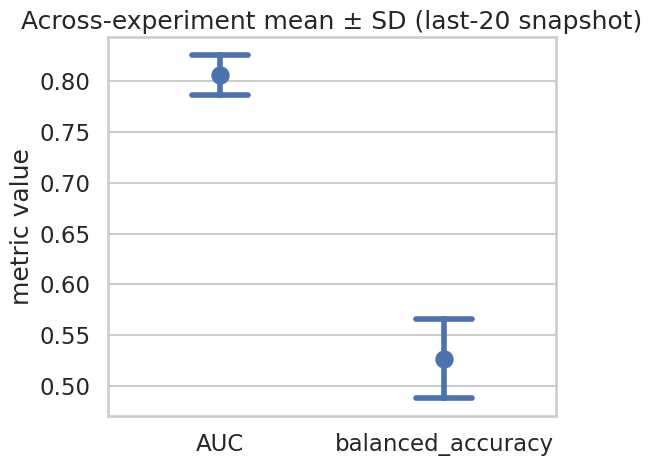

In [11]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

# ── edit here ───────────────────────────────────────────────────
seeds = [42, 43, 44]
experiment_folders = [
    f"042_resnet50_dual5foldstrat_seed{s}_real_perc1.0" for s in seeds
]
base_dir = Path("experiments")
patience = 20                     # last-N rule
# ────────────────────────────────────────────────────────────────

# ----------------------------------------------------------------
# 1. collect one row / experiment (mean of its 5 folds)
# ----------------------------------------------------------------
rows = []
for exp in experiment_folders:
    csv_path = base_dir / exp / "logs.csv"
    if not csv_path.exists():
        print(f"⚠  {exp}: logs.csv not found – skipped")
        continue
    
    df = pd.read_csv(csv_path)
    val_only = df[df.phase == "val"]
    
    # pick the line that is (last_epoch - patience) for every fold
    picks = []
    for fold, g in val_only.groupby("fold"):
        last_ep   = g["epoch"].max()
        target_ep = max(last_ep - patience, g["epoch"].min())
        picks.append(g[g["epoch"] == target_ep])

    fold_df = pd.concat(picks, ignore_index=True)
    metrics = fold_df[["AUC", "balanced_accuracy"]].mean()
    
    rows.append({"experiment": exp, **metrics.to_dict()})

exp_means = (
    pd.DataFrame(rows)
      .set_index("experiment")
      .round(4)
)

# ----------------------------------------------------------------
# 2. show tables
# ----------------------------------------------------------------
print("Per-experiment mean metrics (mean over 5 folds):")
display(exp_means)

summary = pd.concat(
    [exp_means.mean().to_frame("mean_across_experiments").T,
     exp_means.std(ddof=0).to_frame("sd_across_experiments").T]
).round(4)
print("\nAcross-experiment summary:")
display(summary)

# ----------------------------------------------------------------
# 3. point-plots – one dot per metric (AUC / bal-acc), bar = ±SD
# ----------------------------------------------------------------
long_df = (
    exp_means.reset_index()
             .melt(id_vars="experiment",
                   value_vars=["AUC", "balanced_accuracy"],
                   var_name="metric", value_name="value")
)

sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(6, 5))
sns.pointplot(
    data=long_df,
    x="metric", y="value",
    estimator="mean", errorbar="sd", capsize=.25, linestyles=""
)
plt.title("Across-experiment mean ± SD (last-20 snapshot)")
plt.xlabel("")
plt.ylabel("metric value")
plt.tight_layout()
plt.show()
